In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np


from scipy import linalg as scipy_linalg
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

import itertools


In [2]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired3C'].values


X = prosody_data.iloc[:, 6:].values

X = StandardScaler().fit_transform(X)
#X = MinMaxScaler().fit_transform(X)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)
principalDf = pd.DataFrame(data = X_pca , columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20'])
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-4.168954,-0.014177,-2.475345,-0.810887,0.158383,-1.744078,-0.390702,0.265557,0.664754,1.053831,0.852552,-1.198336,0.200074,-0.733557,-1.235026,0.103750,1.158141,-0.448290,-0.798075,-0.337503
1,-4.464238,-1.009904,-3.092034,-1.055293,0.230520,-2.541514,-0.267613,0.678307,0.507352,1.239573,0.995482,-1.702561,0.455358,-0.275869,0.053689,0.166670,1.432208,-0.265970,-0.719117,-0.078944
2,-3.358534,0.101685,-2.585497,0.410778,1.336423,-2.501500,-0.698387,-0.107751,0.624624,1.094847,0.804503,-1.841718,0.020709,0.410357,0.199704,-0.220433,1.292672,-0.222929,-0.221246,0.059739
3,0.865701,-2.990583,-3.409886,3.427491,1.778394,-1.202344,0.742877,-1.396202,1.127660,-2.928792,-0.275886,-2.670820,-0.624264,-0.108606,0.953120,1.146615,1.633533,-0.566025,0.949253,0.609705
4,1.506023,-3.118672,-3.273643,1.326754,1.733809,-1.359053,1.285821,-1.184057,0.794970,-2.643699,0.574298,-1.356925,-0.637006,-0.660128,1.174411,1.339954,1.470792,-0.388278,1.198830,-0.148597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-1.722865,0.621413,-2.511901,3.169306,-2.441883,-1.714762,-0.227481,0.926876,-1.283814,0.087163,0.307397,0.515537,1.552995,0.432319,-0.029450,-0.957239,0.665871,-0.728962,0.637528,-0.351574
676,-2.157176,0.879941,-2.401855,1.721035,-2.208042,-2.682219,-0.636729,1.491811,-1.361853,0.804771,0.408122,0.674544,2.267882,0.250245,0.651270,-1.064502,0.207514,-0.407406,-0.112200,-0.124709
677,-2.407032,2.363606,-1.592129,4.621724,-3.687422,0.870559,1.078026,-1.171054,-1.566512,-2.676463,0.168668,0.383446,1.421379,1.610871,0.787216,-0.769473,0.922204,-0.664306,0.115289,-0.676392
678,-0.943823,3.709886,-0.265405,3.604097,-0.754180,-2.480952,-0.034924,1.060394,-0.914385,0.231080,0.813390,0.337749,1.709108,0.380978,0.315782,-0.862296,0.346268,-0.474860,-0.509411,-0.357175


In [4]:
finalDf = pd.concat([principalDf, prosody_data[['Hired3C']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Hired3C
0,-4.168954,-0.014177,-2.475345,-0.810887,0.158383,-1.744078,-0.390702,0.265557,0.664754,1.053831,...,-1.198336,0.200074,-0.733557,-1.235026,0.103750,1.158141,-0.448290,-0.798075,-0.337503,1
1,-4.464238,-1.009904,-3.092034,-1.055293,0.230520,-2.541514,-0.267613,0.678307,0.507352,1.239573,...,-1.702561,0.455358,-0.275869,0.053689,0.166670,1.432208,-0.265970,-0.719117,-0.078944,1
2,-3.358534,0.101685,-2.585497,0.410778,1.336423,-2.501500,-0.698387,-0.107751,0.624624,1.094847,...,-1.841718,0.020709,0.410357,0.199704,-0.220433,1.292672,-0.222929,-0.221246,0.059739,1
3,0.865701,-2.990583,-3.409886,3.427491,1.778394,-1.202344,0.742877,-1.396202,1.127660,-2.928792,...,-2.670820,-0.624264,-0.108606,0.953120,1.146615,1.633533,-0.566025,0.949253,0.609705,1
4,1.506023,-3.118672,-3.273643,1.326754,1.733809,-1.359053,1.285821,-1.184057,0.794970,-2.643699,...,-1.356925,-0.637006,-0.660128,1.174411,1.339954,1.470792,-0.388278,1.198830,-0.148597,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-1.722865,0.621413,-2.511901,3.169306,-2.441883,-1.714762,-0.227481,0.926876,-1.283814,0.087163,...,0.515537,1.552995,0.432319,-0.029450,-0.957239,0.665871,-0.728962,0.637528,-0.351574,0
676,-2.157176,0.879941,-2.401855,1.721035,-2.208042,-2.682219,-0.636729,1.491811,-1.361853,0.804771,...,0.674544,2.267882,0.250245,0.651270,-1.064502,0.207514,-0.407406,-0.112200,-0.124709,0
677,-2.407032,2.363606,-1.592129,4.621724,-3.687422,0.870559,1.078026,-1.171054,-1.566512,-2.676463,...,0.383446,1.421379,1.610871,0.787216,-0.769473,0.922204,-0.664306,0.115289,-0.676392,0
678,-0.943823,3.709886,-0.265405,3.604097,-0.754180,-2.480952,-0.034924,1.060394,-0.914385,0.231080,...,0.337749,1.709108,0.380978,0.315782,-0.862296,0.346268,-0.474860,-0.509411,-0.357175,0


In [5]:
def CreateModel( X_train, X_test, y_train, y_test):
    y_21_test = []
    for i in y_test:
        if(i == 2):
            y_21_test.append(2)
        else:
            y_21_test.append(1)

    y_21_train = []
    for i in y_train:
        if(i == 2):
            y_21_train.append(2)
        else:
            y_21_train.append(1)

    X = X_train
    y = y_21_train
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)
    clf.score(X, y)
    #AdaBoostClassifier(n_estimators=100, random_state=0)
    y_21_predict=clf.predict(X_test)
    target_names = ['class 2', 'class 1']      
    print(classification_report(y_21_test,y_21_predict,target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train!= 2]
    X_10_test = X_test.loc[y_test!= 2]

    #select from y_train where y value is not 2
    y_10_train= []
    for i in y_train:
        if(i != 2):
            y_10_train.append(i)

    #select from y_test where y value is not 2
    y_10_test = []
    for i in y_test:
        if(i != 2):
            y_10_test.append(i)

    X = X_10_train
    y = y_10_train
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']      
    print(classification_report(y_10_test,y_10_predict ,target_names=target_names, zero_division=0))

    y1=list(y_test)
    y2=list(y_21_predict)
    y3=list(y_10_predict)
    combined_Predictions = []
    k=0
    for (i,j) in zip(y1,y2):
        if(i!=2):
            combined_Predictions.append(y3[k])
            k=k+1
        else:
            combined_Predictions.append(j)
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))
    
    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, combined_Predictions), annot = True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
   # metrics.plot_roc_curve(clf, X_test, y_test) 
    
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    f1 =  f1_score(y_test, combined_Predictions, average='weighted')
    precision = precision_score(y_test, combined_Predictions,average='micro')
  
   
    return acc,f1,precision

              precision    recall  f1-score   support

     class 2       0.98      0.91      0.94        46
     class 1       0.84      0.95      0.89        22

    accuracy                           0.93        68
   macro avg       0.91      0.93      0.92        68
weighted avg       0.93      0.93      0.93        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.96      1.00      0.98        23
     class 2       1.00      0.95      0.98        22

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.99        68
weighted avg       0

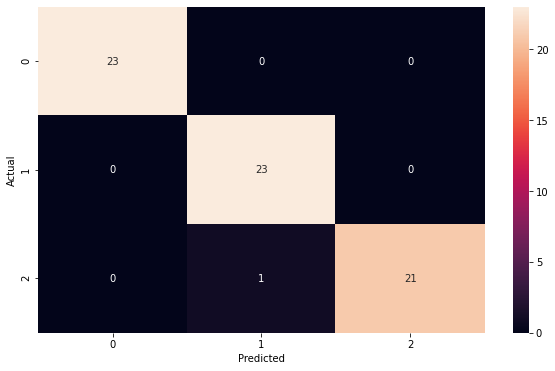

              precision    recall  f1-score   support

     class 2       0.98      0.96      0.97        46
     class 1       0.91      0.95      0.93        22

    accuracy                           0.96        68
   macro avg       0.95      0.96      0.95        68
weighted avg       0.96      0.96      0.96        68

              precision    recall  f1-score   support

     class 1       0.96      1.00      0.98        23
     class 0       1.00      0.96      0.98        23

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98        23
     class 1       0.96      0.96      0.96        23
     class 2       1.00      0.95      0.98        22

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0

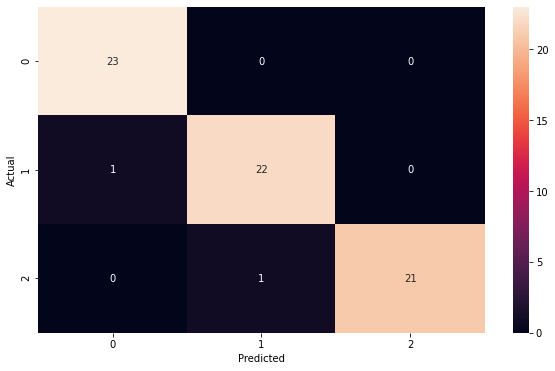

              precision    recall  f1-score   support

     class 2       0.96      0.96      0.96        46
     class 1       0.91      0.91      0.91        22

    accuracy                           0.94        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.94      0.94      0.94        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.92      1.00      0.96        23
     class 2       1.00      0.91      0.95        22

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0

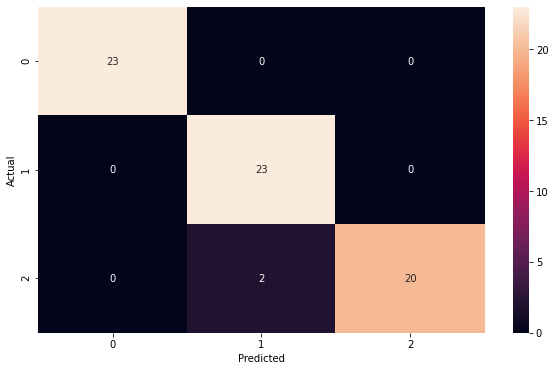

              precision    recall  f1-score   support

     class 2       0.94      0.96      0.95        46
     class 1       0.90      0.86      0.88        22

    accuracy                           0.93        68
   macro avg       0.92      0.91      0.91        68
weighted avg       0.93      0.93      0.93        68

              precision    recall  f1-score   support

     class 1       0.96      1.00      0.98        23
     class 0       1.00      0.96      0.98        23

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98        23
     class 1       0.88      0.96      0.92        23
     class 2       1.00      0.86      0.93        22

    accuracy                           0.94        68
   macro avg       0.95      0.94      0.94        68
weighted avg       0

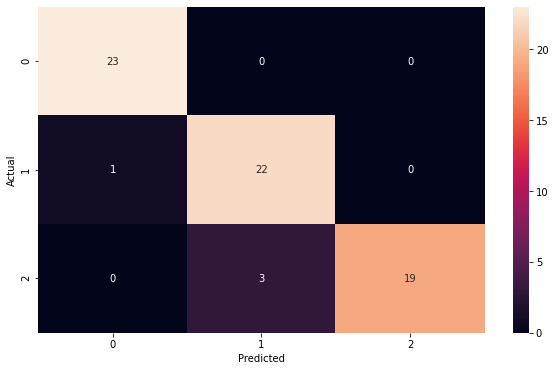

              precision    recall  f1-score   support

     class 2       0.90      1.00      0.95        46
     class 1       1.00      0.77      0.87        22

    accuracy                           0.93        68
   macro avg       0.95      0.89      0.91        68
weighted avg       0.93      0.93      0.92        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.82      1.00      0.90        23
     class 2       1.00      0.77      0.87        22

    accuracy                           0.93        68
   macro avg       0.94      0.92      0.92        68
weighted avg       0

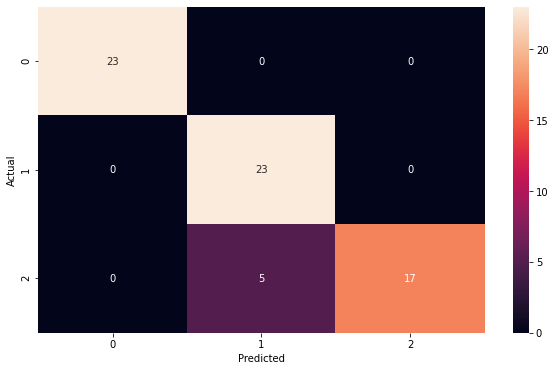

              precision    recall  f1-score   support

     class 2       0.98      0.96      0.97        45
     class 1       0.92      0.96      0.94        23

    accuracy                           0.96        68
   macro avg       0.95      0.96      0.95        68
weighted avg       0.96      0.96      0.96        68

              precision    recall  f1-score   support

     class 1       1.00      0.96      0.98        23
     class 0       0.96      1.00      0.98        22

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

              precision    recall  f1-score   support

     class 0       1.00      0.96      0.98        23
     class 1       0.92      1.00      0.96        22
     class 2       1.00      0.96      0.98        23

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0

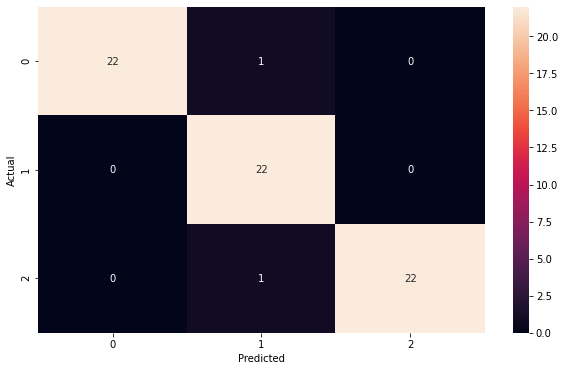

              precision    recall  f1-score   support

     class 2       0.91      0.93      0.92        45
     class 1       0.86      0.83      0.84        23

    accuracy                           0.90        68
   macro avg       0.89      0.88      0.88        68
weighted avg       0.90      0.90      0.90        68

              precision    recall  f1-score   support

     class 1       0.96      0.96      0.96        23
     class 0       0.95      0.95      0.95        22

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96        23
     class 1       0.81      0.95      0.88        22
     class 2       1.00      0.83      0.90        23

    accuracy                           0.91        68
   macro avg       0.92      0.91      0.91        68
weighted avg       0

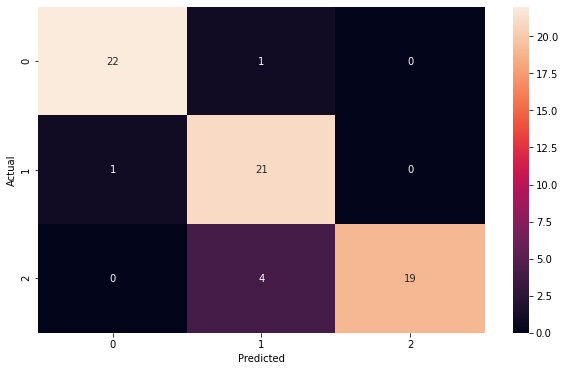

              precision    recall  f1-score   support

     class 2       0.98      1.00      0.99        45
     class 1       1.00      0.96      0.98        23

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.98        68
weighted avg       0.99      0.99      0.99        68

              precision    recall  f1-score   support

     class 1       0.96      1.00      0.98        23
     class 0       1.00      0.95      0.98        22

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98        23
     class 1       0.95      0.95      0.95        22
     class 2       1.00      0.96      0.98        23

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0

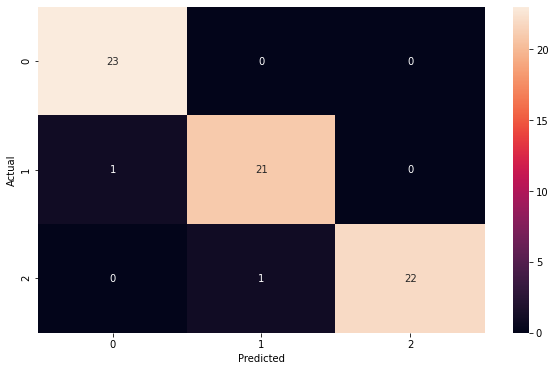

              precision    recall  f1-score   support

     class 2       0.96      0.96      0.96        45
     class 1       0.91      0.91      0.91        23

    accuracy                           0.94        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.94      0.94      0.94        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        22

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.92      1.00      0.96        22
     class 2       1.00      0.91      0.95        23

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0

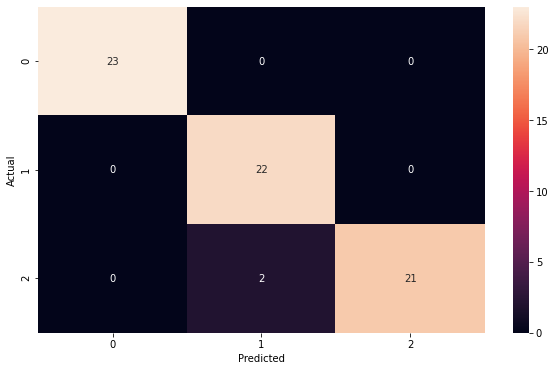

              precision    recall  f1-score   support

     class 2       0.92      1.00      0.96        45
     class 1       1.00      0.83      0.90        23

    accuracy                           0.94        68
   macro avg       0.96      0.91      0.93        68
weighted avg       0.95      0.94      0.94        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        22

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.85      1.00      0.92        22
     class 2       1.00      0.83      0.90        23

    accuracy                           0.94        68
   macro avg       0.95      0.94      0.94        68
weighted avg       0

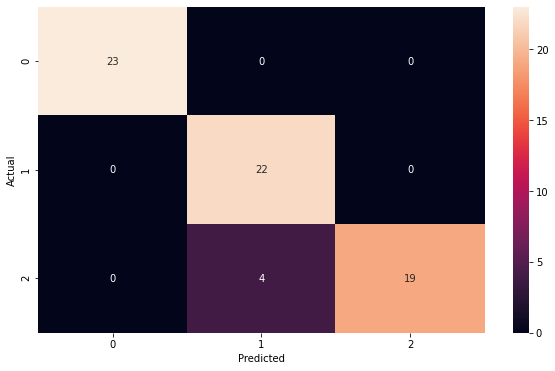

[98.52941176470588, 97.05882352941177, 97.05882352941177, 94.11764705882352, 92.64705882352942, 97.05882352941177, 91.17647058823529, 97.05882352941177, 97.05882352941177, 94.11764705882352]
CV Accuracy Score: 95.59% (+/- 2.28%)
CV  F1 Score: 95.58% (+/- 2.28%)
CV  Precision Score: 95.59% (+/- 2.28%)


In [6]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cv_acc_scores =[]
cv_f1_scores =[]
cv_precision_scores =[]
X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    acc,f1,precision = CreateModel( X_train, X_test, y_train, y_test)
    
    
    cv_acc_scores.append(acc*100)
    cv_f1_scores.append(f1*100)
    cv_precision_scores.append(precision*100)
   
print(cv_acc_scores ) 
print("CV Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc_scores), np.std(cv_acc_scores)))
print("CV  F1 Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_f1_scores), np.std(cv_f1_scores)))
print("CV  Precision Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_precision_scores), np.std(cv_precision_scores)))
